<a href="https://colab.research.google.com/github/shruti2120/EDA_HOTEL__BOOKING_ANALYSIS/blob/main/Hotel_booking_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**HOTEL BOOKING ANALYSIS**

Have you ever wondered when the best time of year to book a hotel room is ? Or the optimal length of stay in order to get the best daily rate ? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests *? This hotel booking dataset can help you explore those questions! This data set contains booking information for a *city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. Explore and analyze the data to discover important factors that govern the bookings.

In This EDA we have data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.

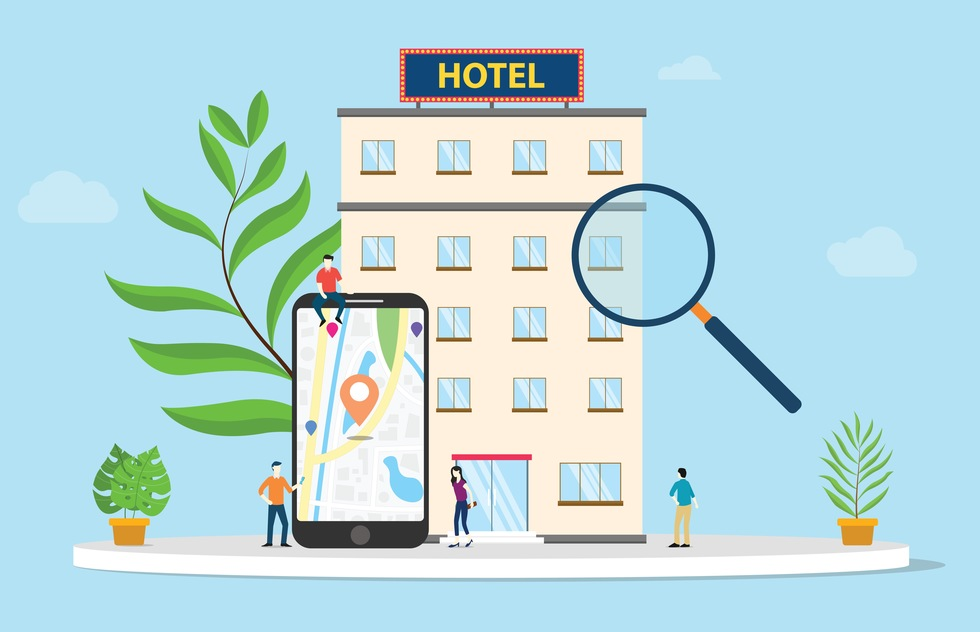

#**IMPORT REQUIRED LIBRARY**

In [148]:
# Importing necessary libraries req for capstone project
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly 
import plotly.express as px

import folium
from folium.plugins import HeatMap

In [149]:
#mounting drive to google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
#reading csv file
df=pd.read_csv('/content/drive/MyDrive/CSV/Hotel Bookings.csv')

In [151]:
#exploring the data of csv file
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [152]:
#presented the shape ( rows and column numbers)
print(f'shape is Rows={df.shape[0]},Columns={df.shape[1]}')

shape is Rows=119390,Columns=32


In [153]:
#presenting info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [154]:
#columns present in dataset 
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [155]:
#Determine the minimum, maximum ,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [156]:
#Check for the  rows and their respective columns.
df.head()



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [157]:
 #check of the Last 5 rows by using function which takes first 5 values by default.
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [158]:
#creating a copy of dataset
df1=df.copy()

In [159]:
#checking null values from dataset
df1.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

So we Have Null values in columns- Company, agent, Country, children.
* for company and agent we fill the NA values with 0.
* for country we fill NA values with object 'Others'.
* As the count of NA values in Children Column is only 4, so we can replace with 0 considering no childrens.

In [160]:
#checking the null values in particular columns.
df1.isna().sum().sort_values(ascending=False)[:5].reset_index().rename(columns={'index':'columns',0:'null values'})

,columns,null values
0,company,112593
1,agent,16340
2,country,488
3,children,4
4,reserved_room_type,0


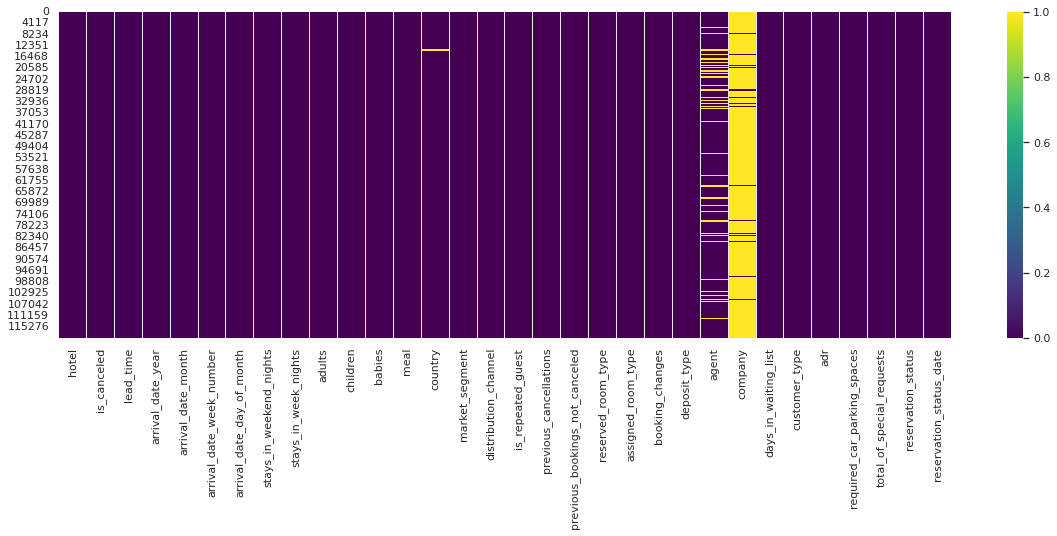

In [161]:
#presenting the null values through heatmap.
plt.figure(figsize=(20,6))
sns.heatmap(df1.isna(),cmap='viridis')

In [162]:
#Here we deal with null values
df1["agent"].fillna(0.0,inplace=True)


In [163]:
#Here we fill NA value of country by others
df1["country"].fillna('others',inplace=True)


In [164]:
#Here we fill NA value of company by 0.0 as it is of float object
df1["company"].fillna(0.0,inplace=True)


In [165]:
#Here we fill NA value of children by 0
df1["children"].fillna(0,inplace=True)

In [166]:
#Handled null values
df1.isna().sum().sort_values(ascending=False)[:5].reset_index().rename(columns={'index':'columns',0:'null values'})


,columns,null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0


*** Here we successfully deal with NAN values**

In [167]:
# Performing this operation for the purpose of eliminating duplicate data from the raw dataframe.
df1[df1.duplicated()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,0.0,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,0.0,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,No Deposit,240.0,0.0,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,No Deposit,240.0,0.0,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,No Deposit,9.0,0.0,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,0.0,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [168]:
# Checking duplicate values of data.

# Checking for the duplicate values rows.(True indicates Duplicate values.)
df1.duplicated().value_counts()

False    87396
True     31994
dtype: int64

Here we got to know that we have 31994 duplicate entries in the dataset.

In [169]:
# Dropped the duplicates rows to Extract the dataframe.

df1= df1.drop_duplicates()

In [170]:
# The shape of data after removing the null and duplicate values.

df1.shape

(87396, 32)

In [171]:
print(f'Now the final data without null and duplicate values is {df1.shape[0]} rows and {df1.shape[1]} columns.')

Now the final data without null and duplicate values is 87396 rows and 32 columns.


Now we are going to fetch unique values from our dataset

In [172]:
#The unique values from the column hotel.
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [173]:
# Now we explore the arrival_date_month column 
df1_final_arrival_month = np.concatenate((df1['arrival_date_month'].unique()[6:],df1['arrival_date_month'].unique()[0:6]))
df1_final_arrival_month

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [174]:
#unique values from meal.
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [175]:
#unique values from market segment.
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [176]:
#unique values from distribution channel
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [177]:
a=df1['adults'].unique()
b=df1['babies'].unique()
c=df1['children'].unique()
print(a)
print(b)
print(c)

[ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
[ 0  1  2 10  9]
[ 0.  1.  2. 10.  3.]


In [178]:
# Here we get the country of customer and we get to know the rank of countries from where the customer is arrived most.
df1.country.value_counts().head(15)

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
ITA     3066
IRL     3016
BEL     2081
BRA     1995
NLD     1911
USA     1875
CHE     1570
CN      1093
AUT      947
SWE      837
Name: country, dtype: int64

In [179]:
# Now we visualize the world map for the same. 
temp = df1['country'].value_counts().reset_index().rename(columns={'index':'country','country':'count'})
guest_map = px.choropleth(temp,
                          locations=temp['country'],
                          color=np.log(temp['count']), 
                          hover_name=temp['country'], 
                          color_continuous_scale=px.colors.sequential.Plasma,
                          title="Home country of guests")
guest_map.show()


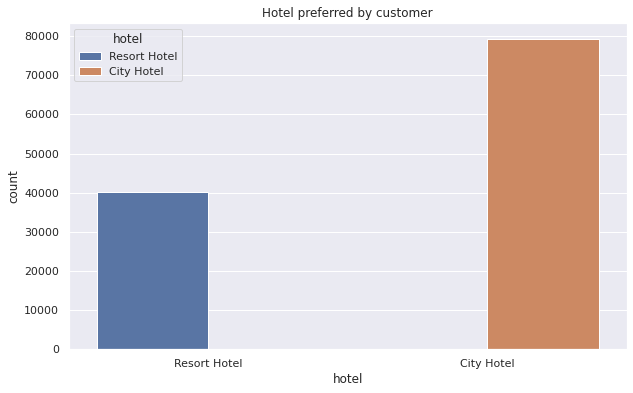

In [180]:
# Hotel type and preferred Hotel type
# Visualization by the help of bar graph.
plt.figure(figsize=(10,6))
sns.countplot(x='hotel', hue = 'hotel', data= df)
plt.title('Hotel preferred by customer')

plt.show()

Customer preferred City hotel more than Resort hotel.

In [181]:
# Number of booking data contains babies.

df1.babies.value_counts()

0     86482
1       897
2        15
10        1
9         1
Name: babies, dtype: int64

In [182]:
# Number of booking contains adults.

df1.adults.value_counts()

2     64497
1     16503
3      5935
0       385
4        60
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [183]:
# Number of booking contains childrens.

df1.children.value_counts()


0.0     79032
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

In [184]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

filter = (df1.children == 0) & (df1.adults == 0) & (df1.babies == 0)
df1[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [185]:
df1=df1[~filter]
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [186]:
df1['arrival_date_year'].value_counts()

2016    42313
2017    31633
2015    13284
Name: arrival_date_year, dtype: int64

Text(0.5, 1.0, 'Year Wise bookings')

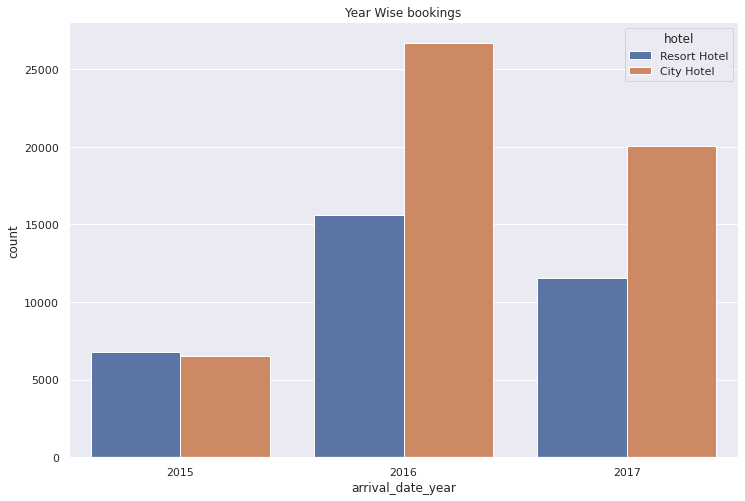

In [187]:
# Booking of hotels year wise.

plt.figure(figsize=(12,8))

# Plot with countplot.

sns.countplot(x=df1['arrival_date_year'],hue=df1['hotel'])
plt.title("Year Wise bookings")

In [188]:
# creating groupby table of arrival_date_month , hotel and adr.
bookings_by_months_df=df1.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()

# Create month list.

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# It will take the order of the month list in the df along with values.

bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)


# Sorting.

bookings_by_months_df

,arrival_date_month,hotel,adr
0,April,City Hotel,117.314134
1,April,Resort Hotel,79.283805
2,August,City Hotel,125.148662
3,August,Resort Hotel,187.566659
4,December,City Hotel,93.204767
5,December,Resort Hotel,65.488671
6,February,City Hotel,89.266427
7,February,Resort Hotel,54.102809
8,January,City Hotel,85.269875
9,January,Resort Hotel,49.181693


In [189]:
df1['reserved_room_type'].value_counts()

A    56436
D    17376
E     6036
F     2820
G     2050
B      996
C      914
H      596
L        6
Name: reserved_room_type, dtype: int64

In [190]:
df1['assigned_room_type'].value_counts()

A    46283
D    22419
E     7190
F     3627
G     2495
C     2160
B     1811
H      706
I      353
K      185
L        1
Name: assigned_room_type, dtype: int64

Text(0.5, 1.0, 'Most preferred Room type')

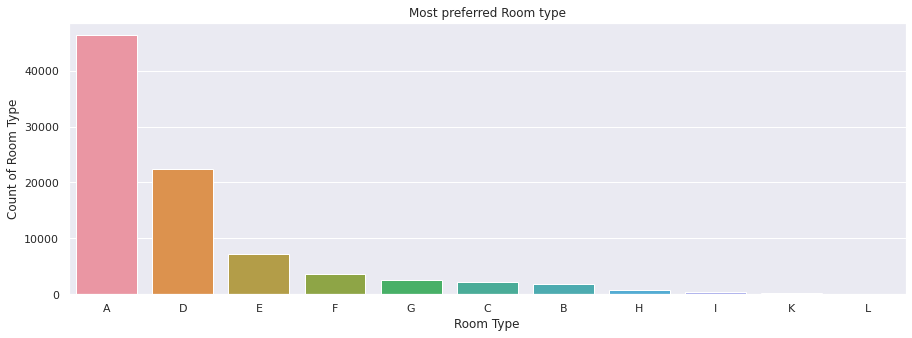

In [191]:
# Analysing the data of most preferred room type.

# Set plotsize.
plt.figure(figsize=(15,5))

# Plotting.
sns.countplot(x=df1['assigned_room_type'],order=df1['assigned_room_type'].value_counts().index) 

# Set x label for the plot.
plt.xlabel('Room Type')

# Set y label for the plot.
plt.ylabel('Count of Room Type')

# Set title for the plot.
plt.title("Most preferred Room type")


* The Most preferred Room type is A ,D and E.

In [192]:
df1['is_canceled'].value_counts()

0    63221
1    24009
Name: is_canceled, dtype: int64

In [193]:
# Grouping all counts of market segment on the basis of hotel.

market_segment_df=df1[df1['is_canceled']==1]   # canceled=1
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,54
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,263
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,887
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1257


Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

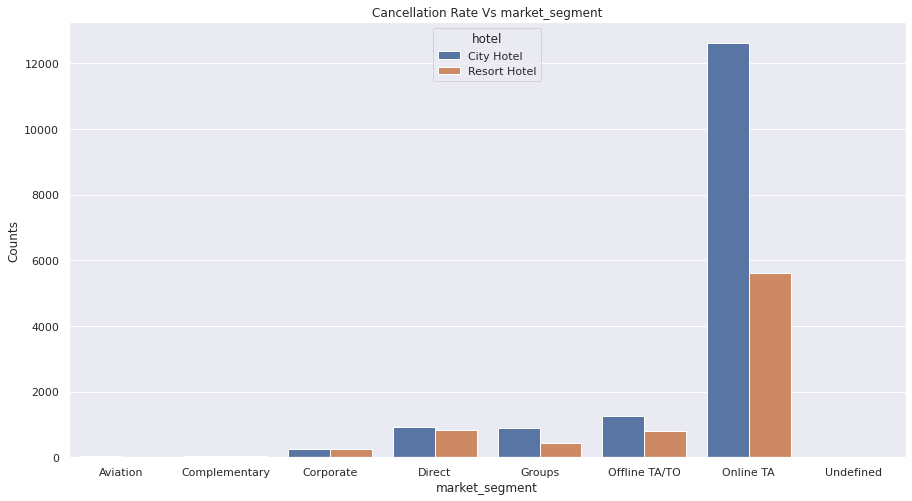

In [194]:
# Set plotsize and plot barchart.

plt.figure(figsize=(15,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)

# set labels.

plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

* Online T/A' has the max_cancellation in both Hotels than the market segment.
* In order to reduce the booking cancellations, hotels need to set the refundable/non-refundable and deposit policies.

In [195]:
# Top 10 agent that involved in most booking.

df1['agent'].value_counts().head(10)

9.0      28721
240.0    13028
0.0      12141
14.0      3342
7.0       3294
250.0     2779
241.0     1644
28.0      1493
8.0       1383
1.0       1228
Name: agent, dtype: int64

In [196]:
#Return highest bookings made by agents.
highest_bookings= df1.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # As agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# Taking top 10 bookings made by agent.
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228
6,6.0,1117


Text(0.5, 1.0, 'Most Bookings Made by the agent')

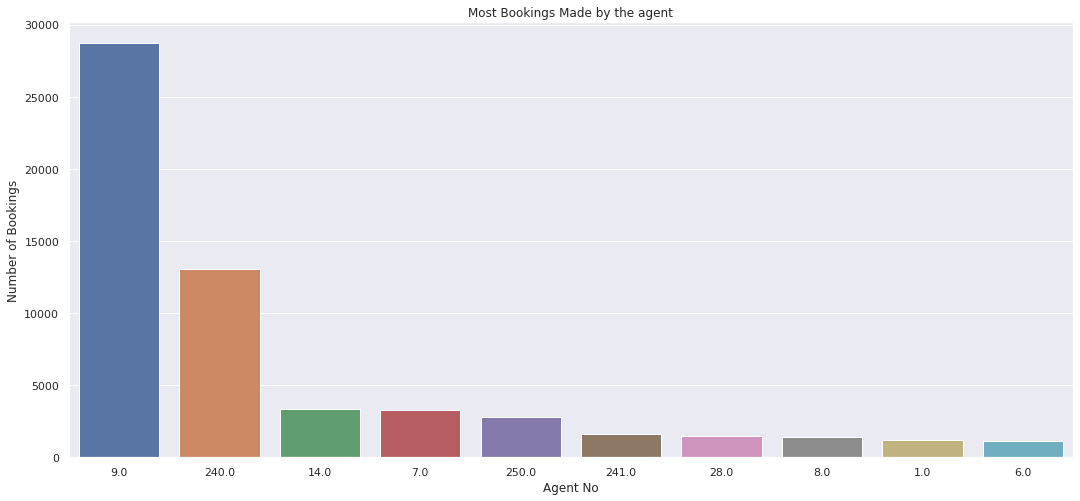

In [197]:
# Number of bookings made by each agent.

plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")


* Here we get to konw is agent number 9.0 made the max_booking.

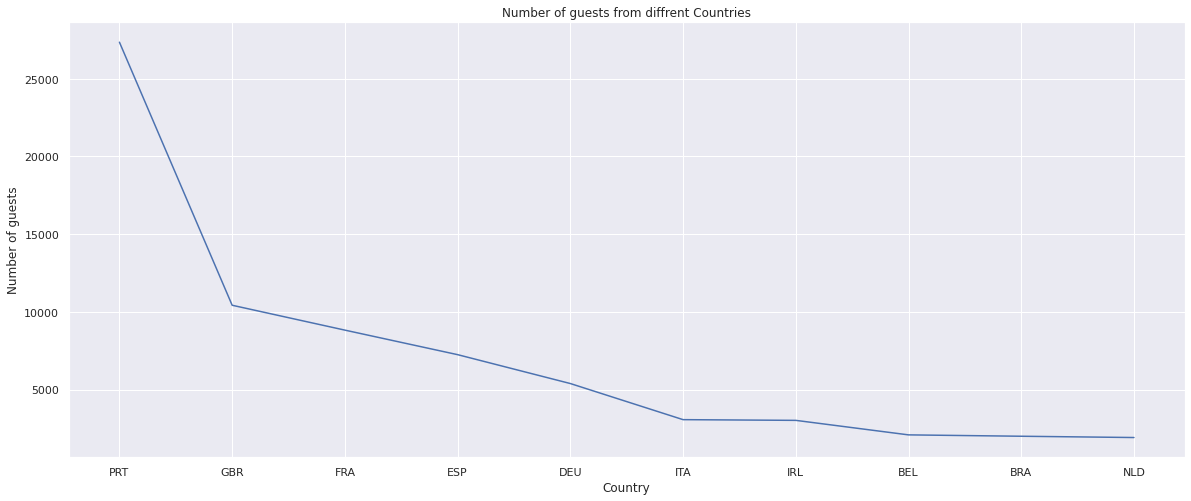

In [198]:
# Counting the number of guests from top 10 countries.

# Counting the guests from various countries.
country_df_a=df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]
# country_df_=df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})

# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))

sns.lineplot(x=country_df_a['country'],y=country_df_a['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")

plt.show()

In [199]:
df1['customer_type'].value_counts()

Transient          71862
Transient-Party    11692
Contract            3135
Group                541
Name: customer_type, dtype: int64

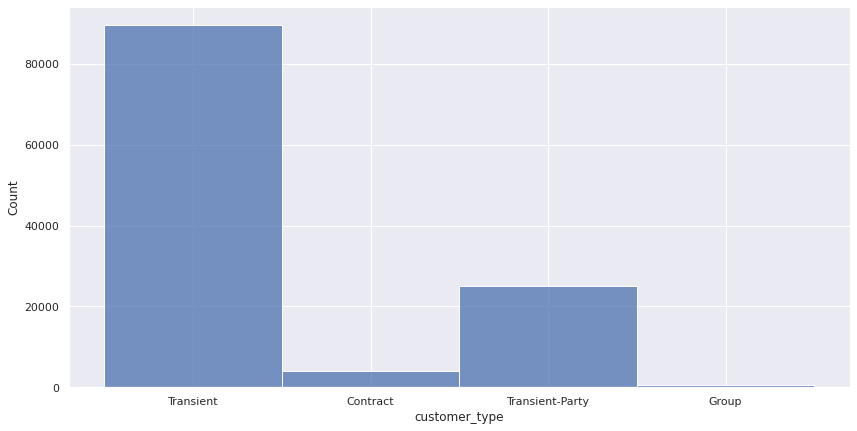

In [200]:
# Customer type.
plt.figure(figsize=(14,7))
ax = sns. histplot(df, x="customer_type",stat="count")
plt.show()

* Transient customer type is max (i.e 71986).
* Number of Booking associated by the Group type is vey low.

In [201]:
# Customer repetation. ('1'. Shows the values of repeated customers)
df1.is_repeated_guest.value_counts()

0    83866
1     3364
Name: is_repeated_guest, dtype: int64

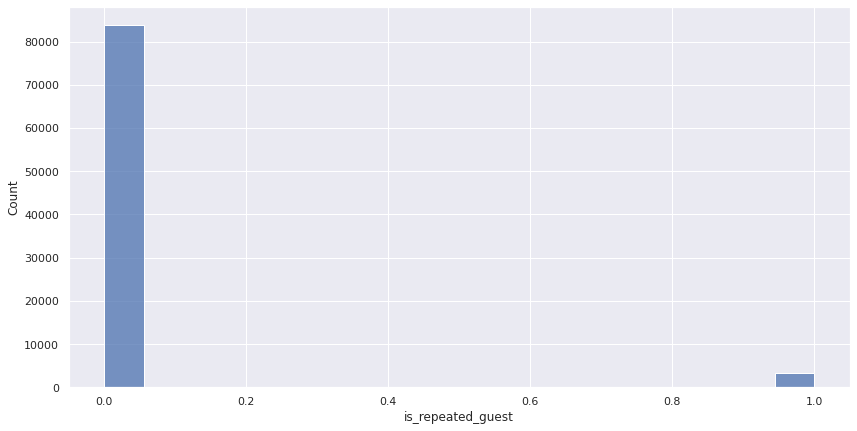

In [202]:
# repeated guest=1
# not repeated guest=0
plt.figure(figsize=(14,7))
sns.histplot(df1,x='is_repeated_guest',stat='count')
plt.show()

In [203]:
df1.is_canceled.value_counts()

0    63221
1    24009
Name: is_canceled, dtype: int64

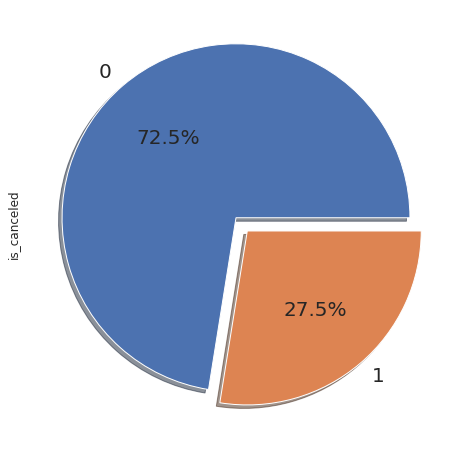

In [204]:
# Percentage of cancellation of booking.

# Which country has max value of cancellation of booking.

df1['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)

* Here Non cancelled boking is 72.5%.
* Here 0 signifies non cancelled and 1 signifies Cancelled.
* 27.5 % of the bookings was cancelled.

In [205]:
# We are checking the data whether which type of deposit preferred by customer.
df1.deposit_type.value_counts()

No Deposit    86085
Non Refund     1038
Refundable      107
Name: deposit_type, dtype: int64

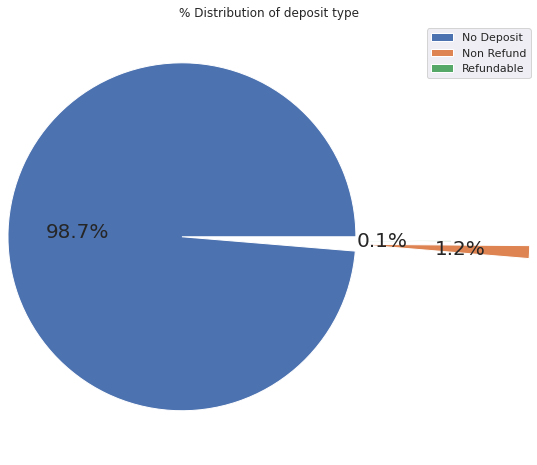

In [206]:
# Percentage distribution of Deposite type

df1['deposit_type'].value_counts().plot.pie(explode=(0.5,0.5,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("% Distribution of deposit type")
labels=df1['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

In [207]:
# Stays in week nignts and weekend nights. 

df1['stays_in_weekend_nights'].value_counts()

0     35058
2     26376
1     22646
4      1726
3      1143
6       112
5        68
8        58
7        15
9         9
10        7
12        5
13        2
16        2
18        1
19        1
14        1
Name: stays_in_weekend_nights, dtype: int64

In [208]:
df1.stays_in_week_nights.value_counts()

1     22173
2     20730
3     16242
5      9654
4      7857
0      6112
6      1375
10      966
7       962
8       611
9       216
15       68
11       49
12       40
20       39
13       27
14       25
19       20
21       15
16       12
22        7
25        6
18        6
30        4
17        4
24        2
40        2
33        1
42        1
50        1
32        1
26        1
34        1
Name: stays_in_week_nights, dtype: int64

In [209]:
# Here we concate stays_in_weekend_nights and stays_in_week_nights.
df1['stay']=df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

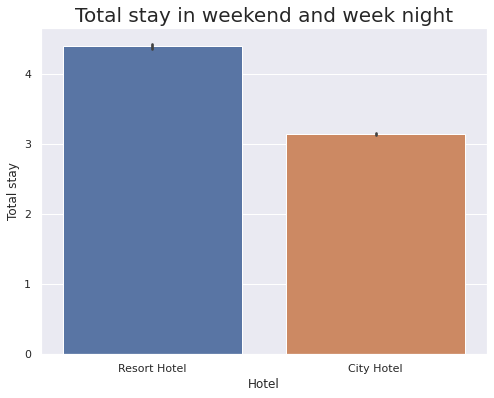

In [210]:
#the total stay in city and resort hotel
plt.rcParams['figure.figsize'] = (8,6)
sns.barplot(x = df1['hotel'],y = df1['stay'])
plt.title('Total stay in weekend and week night',{'fontsize':20})
plt.xlabel('Hotel')
plt.ylabel('Total stay')
plt.show()

* The Total stay in weekend and week night is more in Resort hotel.

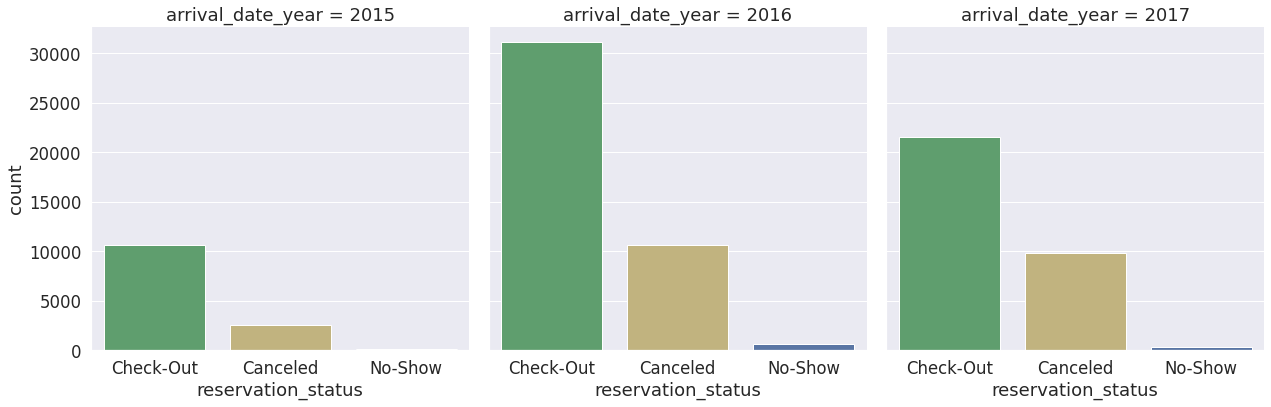

In [211]:
# Arrival status of customer in hotel.

plt.rcParams['figure.figsize'] = [10, 7]
sns.set(style = 'darkgrid', font_scale = 1.5)

# Catplot. (countplot)

sns.catplot(x = 'reservation_status', col = 'arrival_date_year', kind = 'count', data = df1,
            height = 6, palette = ['g', 'y', 'b']);

In [212]:
df1.required_car_parking_spaces.value_counts()

0    79924
1     7273
2       28
3        3
8        2
Name: required_car_parking_spaces, dtype: int64

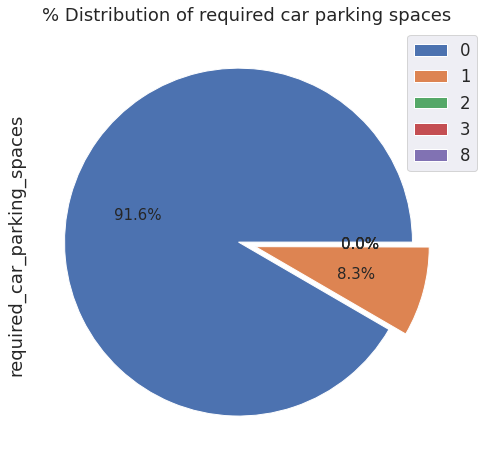

In [213]:
# Requirement of pariking facilities.

df1['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=df1['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

* Here 8.3% customer is required car parking spaces.
* 91.6% customer does not required car parking spaces.

Text(0.5, 1.0, 'Preferred Meal Type')

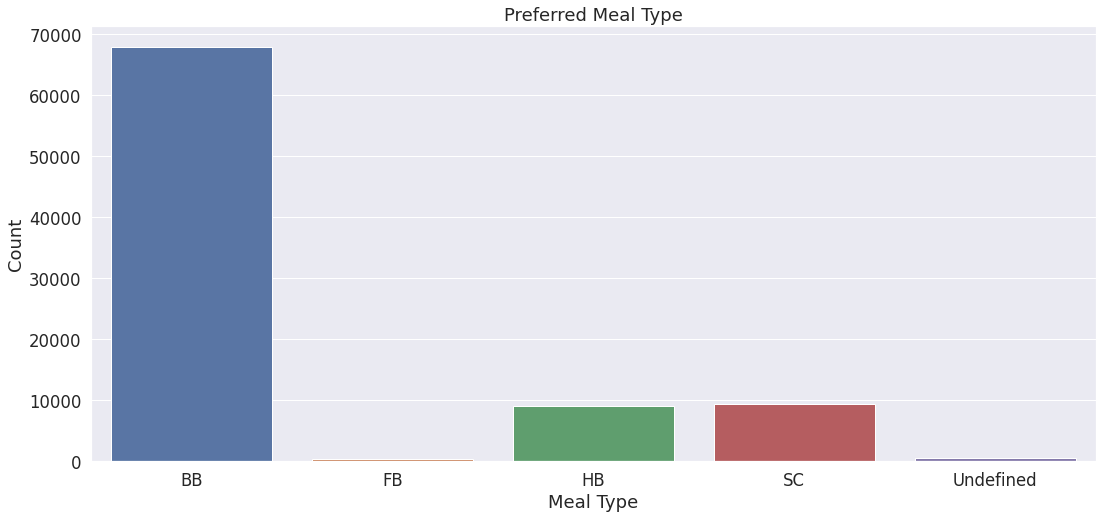

In [214]:
# Preferred meal type of customer.

plt.figure(figsize=(18,8))
sns.countplot(x=df1['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

In [215]:
df1.adr.min()

-6.38

In [216]:
df1[df1.adr<0]=0
df1.adr.mean()

106.51810386334978

In [217]:
df1[df1.adr<0]=df1.adr.mean()

In [218]:
data = df1[df1['is_canceled'] == 0]

px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel')

Text(0, 0.5, 'ADR')

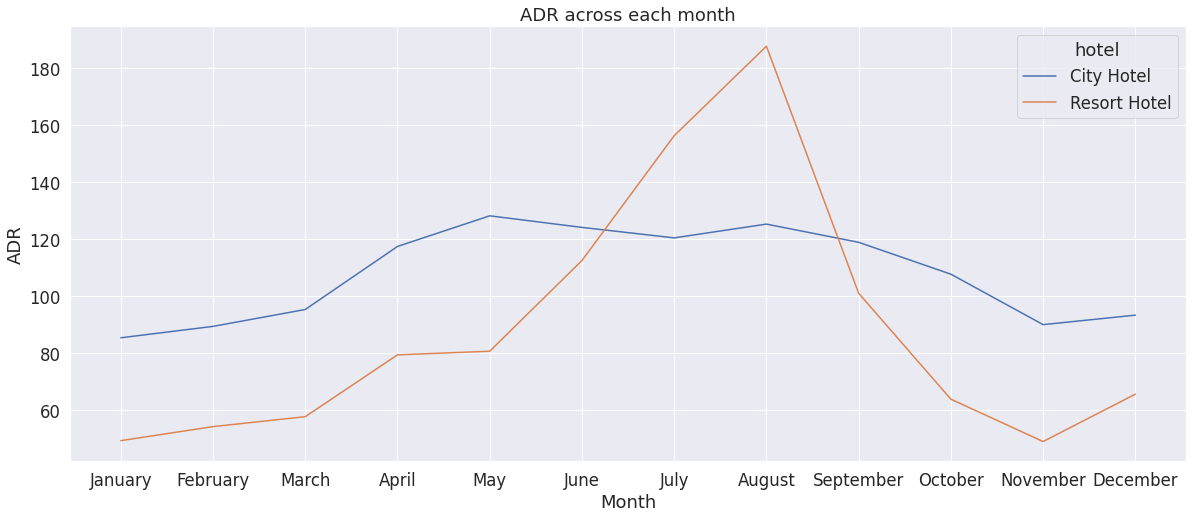

In [219]:
# Set plot size and plot the line.(Graphical representation of ADR)

plt.figure(figsize=(20,8))
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['adr'],hue=bookings_by_months_df['hotel'])

# Set lables.

plt.title('ADR across each month')
plt.xlabel('Month')
plt.ylabel('ADR')

Observation:-

* For ADR of resort hotel is highest in the months June,July,August as compared to City Hotels.
* May be Customers wants to spend their Summer vacation in Resorts Hotels.
* The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December, as the average daily rate in this month is very low.